In [5]:
# Import the required libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Define the tickers and date range
tickers = ["SPY", "SPDN"]
start_date = "2024-10-01"
end_date = "2024-12-30"

# Download data for both tickers
data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker", progress=False)

# Extract "Close" prices
spy_data = data.loc[:, ('SPY', 'Close')]
spdn_data = data.loc[:, ('SPDN', 'Close')]

# Debugging: Print first few rows
print(spy_data.head())
print(spdn_data.head())


Date
2024-10-01    566.712646
2024-10-02    566.951843
2024-10-03    565.915344
2024-10-04    571.057983
2024-10-07    565.895386
Name: (SPY, Close), dtype: float64
Date
2024-10-01    11.169395
2024-10-02    11.159519
2024-10-03    11.189146
2024-10-04    11.090389
2024-10-07    11.199022
Name: (SPDN, Close), dtype: float64


In [7]:
# Calculate daily returns
spy_returns = spy_data.pct_change()
spdn_returns = spdn_data.pct_change()

# Simulate maximum efficiency portfolio
optimal_portfolio = [1.0]  # Start with $1

for i in range(1, len(spy_returns)):
    if spy_returns[i] > spdn_returns[i]:
        optimal_portfolio.append(optimal_portfolio[-1] * (1 + spy_returns[i]))
    else:
        optimal_portfolio.append(optimal_portfolio[-1] * (1 + spdn_returns[i]))

# Create a DataFrame for plotting
optimal_portfolio = pd.Series(optimal_portfolio, index=spy_returns.index)
comparison_df = pd.DataFrame({
    "SPY": (spy_data / spy_data.iloc[0]) * 100,
    "SPDN": (spdn_data / spdn_data.iloc[0]) * 100,
    "Optimal Portfolio": (optimal_portfolio / optimal_portfolio.iloc[0]) * 100
})


C:\Users\sirja\AppData\Local\Temp\ipykernel_16448\501761946.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if spy_returns[i] > spdn_returns[i]:
C:\Users\sirja\AppData\Local\Temp\ipykernel_16448\501761946.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_portfolio.append(optimal_portfolio[-1] * (1 + spy_returns[i]))
C:\Users\sirja\AppData\Local\Temp\ipykernel_16448\501761946.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

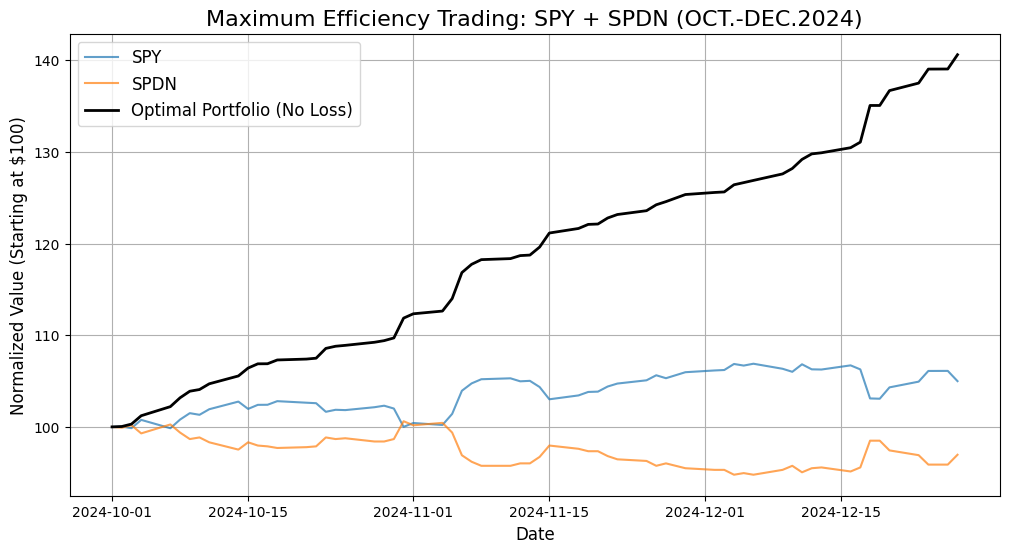

In [8]:
# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["SPY"], label="SPY", alpha=0.7)
plt.plot(comparison_df["SPDN"], label="SPDN", alpha=0.7)
plt.plot(comparison_df["Optimal Portfolio"], label="Optimal Portfolio (No Loss)", linewidth=2, color="black")

plt.title("Maximum Efficiency Trading: SPY + SPDN (OCT.-DEC.2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value (Starting at $100)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()